In [2]:
# ====================================================================
# CELL 1: INSTALLATION AND SETUP (Run this first)
# ====================================================================

# Install required packages
!pip install -q nltk spacy textblob transformers datasets scikit-learn wordcloud matplotlib seaborn pandas numpy gensim plotly

# Download spacy model
!python -m spacy download en_core_web_sm

print("✅ All packages installed successfully!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


In [3]:

# ====================================================================
# CELL 2: IMPORTS AND NLTK DATA DOWNLOAD
# ====================================================================

import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from wordcloud import WordCloud
import re
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
print("Downloading NLTK data...")
nltk_downloads = [
    'punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger',
    'vader_lexicon', 'omw-1.4', 'brown', 'maxent_ne_chunker', 'words'
]

for item in nltk_downloads:
    try:
        nltk.download(item, quiet=True)
    except:
        print(f"Could not download {item}")

print("✅ NLTK data downloaded!")

# Load SpaCy model
try:
    nlp = spacy.load("en_core_web_sm")
    print("✅ SpaCy model loaded!")
except:
    print("❌ SpaCy model not found. Please run the installation cell again")

✅ NLTK data downloaded!
✅ SpaCy model loaded!


In [4]:
# ====================================================================
# CELL 3: BASIC TEXT PROCESSING CLASSES
# ====================================================================

class TextProcessor:
    """A comprehensive text processing class for NLP tasks"""

    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
            self.stop_words = set(nltk.corpus.stopwords.words('english'))
        except:
            print("Warning: Some dependencies not loaded properly")
            self.nlp = None
            self.stop_words = set()

    def basic_cleaning(self, text):
        """Basic text cleaning operations"""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text)

        # Remove special characters (keeping letters, numbers, and basic punctuation)
        text = re.sub(r'[^\w\s.,!?;:]', '', text)

        return text.strip()

    def advanced_cleaning(self, text):
        """Advanced text cleaning with more options"""
        if not isinstance(text, str):
            return ""

        # Basic cleaning first
        text = self.basic_cleaning(text)

        # Remove URLs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)

        return text.strip()

class TextNormalizer:
    """Text normalization utilities"""

    def __init__(self):
        try:
            self.lemmatizer = nltk.WordNetLemmatizer()
            self.stemmer = nltk.PorterStemmer()
        except:
            print("Warning: NLTK components not loaded properly")

    def normalize_case(self, text):
        """Normalize text case"""
        return text.lower() if isinstance(text, str) else ""

    def remove_punctuation(self, text):
        """Remove punctuation from text"""
        if not isinstance(text, str):
            return ""
        return re.sub(r'[^\w\s]', '', text)

    def expand_contractions(self, text):
        """Expand common English contractions"""
        if not isinstance(text, str):
            return ""

        contractions = {
            "can't": "cannot", "won't": "will not", "n't": " not",
            "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am"
        }

        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)

        return text

    def lemmatize_text(self, text):
        """Lemmatize words in text"""
        try:
            words = nltk.word_tokenize(text)
            lemmatized = [self.lemmatizer.lemmatize(word) for word in words]
            return ' '.join(lemmatized)
        except:
            return text

# Test the classes
processor = TextProcessor()
normalizer = TextNormalizer()

# Sample text
sample_text = "I can't believe how amazing NLP technologies are! They're revolutionizing communication."
print("=== TEXT PROCESSING DEMO ===")
print(f"Original: {sample_text}")
print(f"Cleaned: {processor.basic_cleaning(sample_text)}")
print(f"Normalized: {normalizer.normalize_case(sample_text)}")
print(f"Expanded: {normalizer.expand_contractions(sample_text)}")
print("✅ Basic processing working!")

=== TEXT PROCESSING DEMO ===
Original: I can't believe how amazing NLP technologies are! They're revolutionizing communication.
Cleaned: i cant believe how amazing nlp technologies are! theyre revolutionizing communication.
Normalized: i can't believe how amazing nlp technologies are! they're revolutionizing communication.
Expanded: I cannot believe how amazing NLP technologies are! They are revolutionizing communication.
✅ Basic processing working!


=== TEXT ANALYSIS DEMO ===
Total words: 45
Unique words: 39

Top 10 most frequent words:
  nlp: 3
  text: 2
  like: 2
  natural: 1
  language: 1
  processing: 1
  combines: 1
  computer: 1
  science: 1
  applications: 1


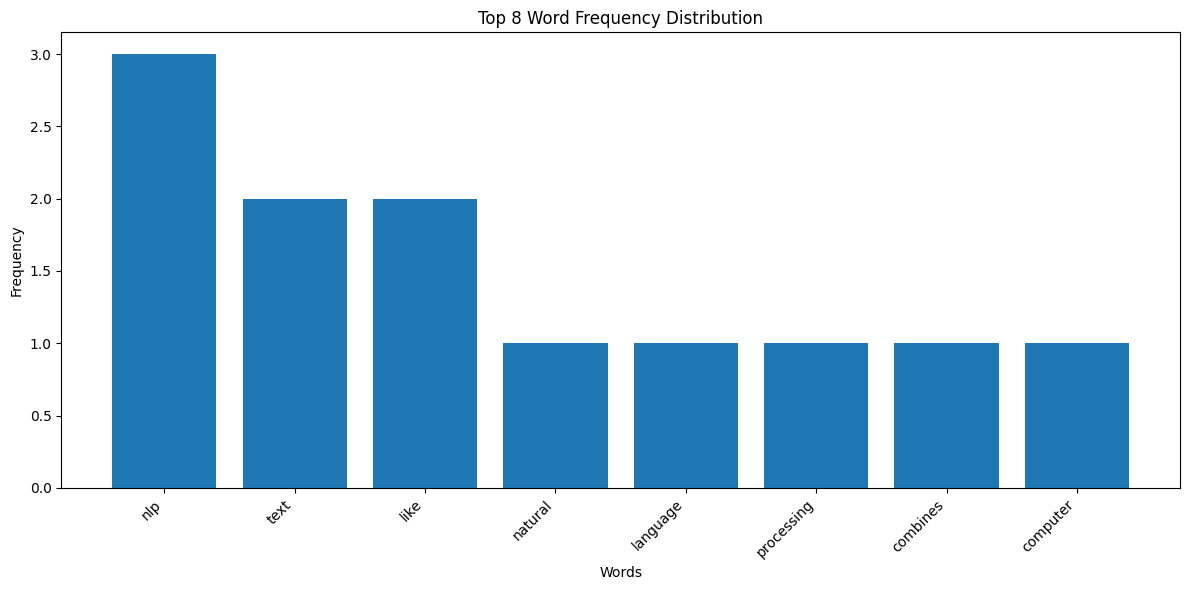

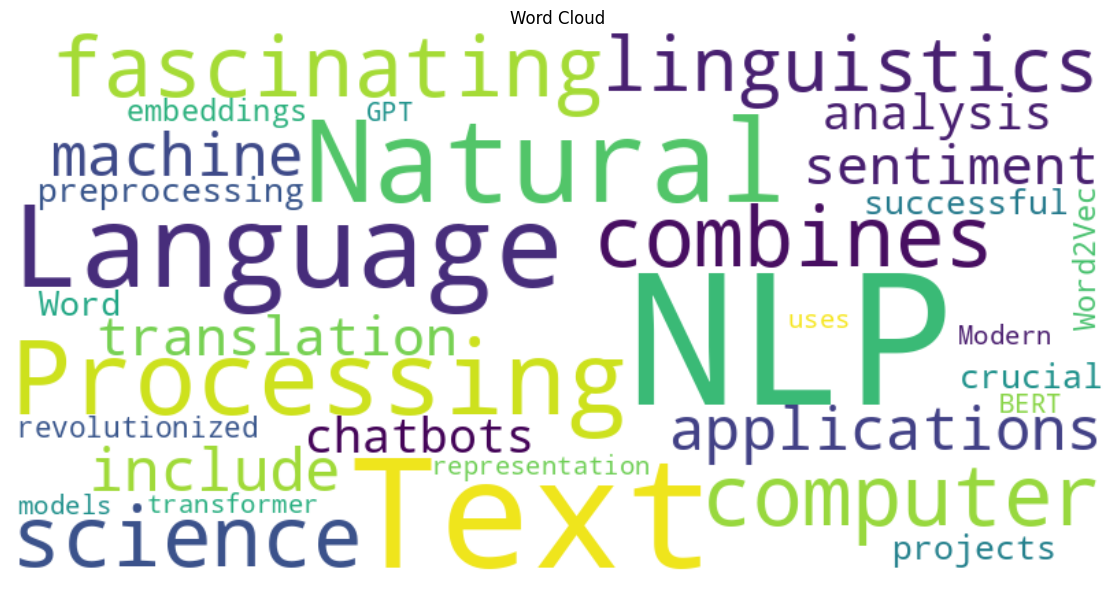

✅ Text analysis working!


In [5]:
# ====================================================================
# CELL 4: TEXT ANALYSIS AND VISUALIZATION
# ====================================================================

class TextAnalyzer:
    """Text analysis utilities for word counting and frequency"""

    def __init__(self):
        try:
            self.stop_words = set(nltk.corpus.stopwords.words('english'))
        except:
            self.stop_words = set()

    def word_count(self, text):
        """Count total words in text"""
        try:
            words = nltk.word_tokenize(text.lower())
            return len(words)
        except:
            return len(text.split()) if text else 0

    def unique_word_count(self, text):
        """Count unique words in text"""
        try:
            words = nltk.word_tokenize(text.lower())
            return len(set(words))
        except:
            return len(set(text.split())) if text else 0

    def word_frequency(self, text, remove_stopwords=True):
        """Calculate word frequency distribution"""
        try:
            words = nltk.word_tokenize(text.lower())
        except:
            words = text.lower().split()

        if remove_stopwords and self.stop_words:
            words = [word for word in words if word not in self.stop_words and word.isalpha()]
        else:
            words = [word for word in words if word.isalpha()]

        try:
            freq_dist = nltk.FreqDist(words)
            return freq_dist
        except:
            from collections import Counter
            return Counter(words)

    def get_top_words(self, text, n=10):
        """Get top n most frequent words"""
        freq_dist = self.word_frequency(text)
        try:
            return freq_dist.most_common(n)
        except:
            return list(freq_dist.items())[:n]

    def plot_frequency_distribution(self, text, top_n=10):
        """Plot word frequency distribution"""
        freq_dist = self.word_frequency(text)

        # Get top words
        if hasattr(freq_dist, 'most_common'):
            top_words = freq_dist.most_common(top_n)
        else:
            top_words = list(freq_dist.items())[:top_n]

        if not top_words:
            print("No words found for plotting")
            return

        words, frequencies = zip(*top_words)

        plt.figure(figsize=(12, 6))
        plt.bar(words, frequencies)
        plt.title(f'Top {top_n} Word Frequency Distribution')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_wordcloud(self, text):
        """Create and display word cloud"""
        if not text:
            print("No text provided for word cloud")
            return

        try:
            # Clean text for wordcloud
            cleaned_text = ' '.join([word for word in text.split() if len(word) > 2])

            wordcloud = WordCloud(
                width=800, height=400,
                background_color='white',
                max_words=100,
                colormap='viridis'
            ).generate(cleaned_text)

            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('Word Cloud')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not create word cloud: {e}")

# Test text analysis
analyzer = TextAnalyzer()

# Sample texts for testing
sample_texts = [
    "Natural Language Processing is fascinating! It combines computer science and linguistics.",
    "NLP applications include machine translation, sentiment analysis, and chatbots.",
    "Text preprocessing is crucial for successful NLP projects.",
    "Word embeddings like Word2Vec have revolutionized text representation.",
    "Modern NLP uses transformer models like BERT and GPT."
]

combined_text = " ".join(sample_texts)

print("=== TEXT ANALYSIS DEMO ===")
print(f"Total words: {analyzer.word_count(combined_text)}")
print(f"Unique words: {analyzer.unique_word_count(combined_text)}")

print(f"\nTop 10 most frequent words:")
top_words = analyzer.get_top_words(combined_text, 10)
for word, freq in top_words:
    print(f"  {word}: {freq}")

# Create visualizations
analyzer.plot_frequency_distribution(combined_text, 8)
analyzer.create_wordcloud(combined_text)

print("✅ Text analysis working!")

In [6]:
#====================================================================
# CELL 5: TOKENIZATION AND ADVANCED NLP
# ====================================================================

class Tokenizer:
    """Various tokenization methods"""

    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            self.nlp = None
            print("Warning: SpaCy not loaded")

    def word_tokenize_nltk(self, text):
        """Tokenize using NLTK"""
        try:
            return nltk.word_tokenize(text)
        except:
            return text.split()

    def word_tokenize_spacy(self, text):
        """Tokenize using SpaCy"""
        if self.nlp:
            doc = self.nlp(text)
            return [token.text for token in doc]
        return text.split()

    def sentence_tokenize_nltk(self, text):
        """Sentence tokenization using NLTK"""
        try:
            return nltk.sent_tokenize(text)
        except:
            return text.split('.')

    def sentence_tokenize_spacy(self, text):
        """Sentence tokenization using SpaCy"""
        if self.nlp:
            doc = self.nlp(text)
            return [sent.text.strip() for sent in doc.sents]
        return text.split('.')

    def custom_tokenize(self, text, pattern=r'\w+'):
        """Custom tokenization using regex"""
        return re.findall(pattern, text)

class AdvancedNLPProcessor:
    """Advanced NLP processing using SpaCy"""

    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            self.nlp = None
            print("Warning: SpaCy not loaded")

    def lemmatization(self, text):
        """Lemmatization using SpaCy"""
        if not self.nlp:
            return text.split()

        doc = self.nlp(text)
        lemmatized = []

        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                lemmatized.append(token.lemma_.lower())

        return lemmatized

    def pos_tagging(self, text):
        """Part-of-speech tagging"""
        if not self.nlp:
            try:
                words = nltk.word_tokenize(text)
                return nltk.pos_tag(words)
            except:
                return [(word, 'UNKNOWN') for word in text.split()]

        doc = self.nlp(text)
        return [(token.text, token.pos_, token.tag_) for token in doc]

    def named_entity_recognition(self, text):
        """Named Entity Recognition"""
        if not self.nlp:
            return []

        doc = self.nlp(text)
        return [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]

    def dependency_parsing(self, text):
        """Dependency parsing"""
        if not self.nlp:
            return []

        doc = self.nlp(text)
        dependencies = []

        for token in doc:
            dependencies.append({
                'text': token.text,
                'dep': token.dep_,
                'head': token.head.text,
                'children': [child.text for child in token.children]
            })

        return dependencies

    def comprehensive_analysis(self, text):
        """Comprehensive NLP analysis"""
        print(f"=== NLP ANALYSIS ===")
        print(f"Text: {text}")
        print()

        # Lemmatization
        lemmas = self.lemmatization(text)
        print(f"Lemmatized words: {lemmas[:10]}")  # Show first 10
        print()

        # POS Tagging
        pos_tags = self.pos_tagging(text)
        print("Part-of-Speech Tags:")
        for word, pos, *tag in pos_tags[:10]:  # Show first 10
            print(f"  {word}: {pos}")
        print()

        # Named Entity Recognition
        entities = self.named_entity_recognition(text)
        print("Named Entities:")
        if entities:
            for entity, label, start, end in entities:
                print(f"  {entity}: {label}")
        else:
            print("  No named entities found.")
        print()

# Test tokenization and advanced NLP
tokenizer = Tokenizer()
advanced_processor = AdvancedNLPProcessor()

test_sentence = "Apple Inc. was founded by Steve Jobs in Cupertino, California."

print("=== TOKENIZATION DEMO ===")
print(f"Original: {test_sentence}")
print(f"NLTK words: {tokenizer.word_tokenize_nltk(test_sentence)}")
print(f"SpaCy words: {tokenizer.word_tokenize_spacy(test_sentence)}")
print()

# Advanced processing
advanced_processor.comprehensive_analysis(test_sentence)

print("✅ Advanced NLP processing working!")


=== TOKENIZATION DEMO ===
Original: Apple Inc. was founded by Steve Jobs in Cupertino, California.
NLTK words: ['Apple', 'Inc.', 'was', 'founded', 'by', 'Steve', 'Jobs', 'in', 'Cupertino,', 'California.']
SpaCy words: ['Apple', 'Inc.', 'was', 'founded', 'by', 'Steve', 'Jobs', 'in', 'Cupertino', ',', 'California', '.']

=== NLP ANALYSIS ===
Text: Apple Inc. was founded by Steve Jobs in Cupertino, California.

Lemmatized words: ['apple', 'inc.', 'found', 'steve', 'jobs', 'cupertino', 'california']

Part-of-Speech Tags:
  Apple: PROPN
  Inc.: PROPN
  was: AUX
  founded: VERB
  by: ADP
  Steve: PROPN
  Jobs: PROPN
  in: ADP
  Cupertino: PROPN
  ,: PUNCT

Named Entities:
  Apple Inc.: ORG
  Steve Jobs: PERSON
  Cupertino: GPE
  California: GPE

✅ Advanced NLP processing working!


=== SENTIMENT ANALYSIS DEMO ===
Training on 30 samples...
=== SENTIMENT ANALYSIS MODEL EVALUATION ===
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         3
    positive       0.17      0.33      0.22         3

    accuracy                           0.11         9
   macro avg       0.06      0.11      0.07         9
weighted avg       0.06      0.11      0.07         9



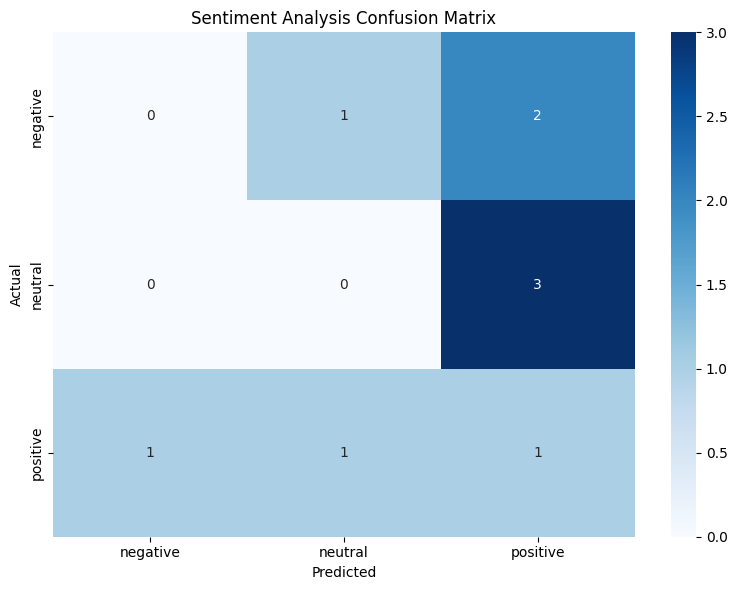


=== SENTIMENT PREDICTIONS ===

Text: I absolutely love this new smartphone!
Scikit-learn: positive (confidence: 0.469)
TextBlob: positive (polarity: 0.335)

Text: This restaurant has terrible food and service.
Scikit-learn: negative (confidence: 0.452)
TextBlob: negative (polarity: -1.000)

Text: The weather is okay today, nothing special.
Scikit-learn: neutral (confidence: 0.478)
TextBlob: positive (polarity: 0.429)

Text: Outstanding performance and excellent value!
Scikit-learn: positive (confidence: 0.441)
TextBlob: positive (polarity: 0.750)

Text: Worst experience ever, completely disappointed.
Scikit-learn: negative (confidence: 0.429)
TextBlob: negative (polarity: -0.875)
✅ Sentiment analysis working!


In [7]:
# ====================================================================
# CELL 6: SENTIMENT ANALYSIS PROJECT
# ====================================================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

class SentimentAnalyzer:
    """Sentiment Analysis using multiple approaches"""

    def __init__(self):
        self.pipeline = None

    def create_sample_dataset(self):
        """Create a sample sentiment dataset"""
        positive_texts = [
            "I love this movie! It's absolutely fantastic.",
            "This product is amazing and works perfectly.",
            "Great service and friendly staff.",
            "Outstanding quality and fast delivery.",
            "Excellent experience, highly recommended!",
            "Perfect solution to my problem.",
            "Beautiful design and great functionality.",
            "Superb quality and excellent value.",
            "Wonderful customer support and quick response.",
            "Amazing features and user-friendly interface."
        ]

        negative_texts = [
            "This movie is terrible and boring.",
            "Worst product I've ever bought.",
            "Poor service and rude staff.",
            "Low quality and slow delivery.",
            "Disappointing experience, not recommended.",
            "Doesn't work as advertised.",
            "Ugly design and confusing interface.",
            "Overpriced and poor quality.",
            "Terrible customer support.",
            "Buggy software with many issues."
        ]

        neutral_texts = [
            "The product is okay, nothing special.",
            "Average service, could be better.",
            "It works fine for basic needs.",
            "Standard quality as expected.",
            "Normal delivery time.",
            "Regular customer service.",
            "Basic functionality available.",
            "Typical product in this category.",
            "Standard features included.",
            "Common design approach."
        ]

        texts = positive_texts + negative_texts + neutral_texts
        labels = (['positive'] * len(positive_texts) +
                 ['negative'] * len(negative_texts) +
                 ['neutral'] * len(neutral_texts))

        return texts, labels

    def train_sklearn_model(self, texts, labels):
        """Train sentiment model using scikit-learn"""
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=0.3, random_state=42, stratify=labels
        )

        # Create pipeline
        self.pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=500, stop_words='english')),
            ('classifier', LogisticRegression(random_state=42, max_iter=1000))
        ])

        # Train model
        self.pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = self.pipeline.predict(X_test)

        # Evaluation
        print("=== SENTIMENT ANALYSIS MODEL EVALUATION ===")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))

        # Get unique labels for proper ordering
        unique_labels = sorted(list(set(labels)))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=unique_labels, yticklabels=unique_labels)
        plt.title('Sentiment Analysis Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

        return X_test, y_test, y_pred

    def predict_sentiment(self, text):
        """Predict sentiment for new text"""
        if self.pipeline is None:
            return "Model not trained yet!"

        prediction = self.pipeline.predict([text])[0]
        probability = self.pipeline.predict_proba([text])[0]

        return {
            'text': text,
            'sentiment': prediction,
            'confidence': max(probability)
        }

    def textblob_sentiment(self, text):
        """Get sentiment using TextBlob"""
        try:
            blob = TextBlob(text)
            polarity = blob.sentiment.polarity

            if polarity > 0.1:
                sentiment = 'positive'
            elif polarity < -0.1:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'

            return {
                'text': text,
                'sentiment': sentiment,
                'polarity': polarity,
                'subjectivity': blob.sentiment.subjectivity
            }
        except:
            return {'text': text, 'sentiment': 'unknown', 'polarity': 0, 'subjectivity': 0}

# Train and test sentiment analyzer
print("=== SENTIMENT ANALYSIS DEMO ===")
sentiment_analyzer = SentimentAnalyzer()

# Create and train model
texts, labels = sentiment_analyzer.create_sample_dataset()
print(f"Training on {len(texts)} samples...")

try:
    X_test, y_test, y_pred = sentiment_analyzer.train_sklearn_model(texts, labels)

    # Test on new sentences
    test_sentences = [
        "I absolutely love this new smartphone!",
        "This restaurant has terrible food and service.",
        "The weather is okay today, nothing special.",
        "Outstanding performance and excellent value!",
        "Worst experience ever, completely disappointed."
    ]

    print("\n=== SENTIMENT PREDICTIONS ===")
    for sentence in test_sentences:
        sklearn_result = sentiment_analyzer.predict_sentiment(sentence)
        textblob_result = sentiment_analyzer.textblob_sentiment(sentence)

        print(f"\nText: {sentence}")
        print(f"Scikit-learn: {sklearn_result['sentiment']} (confidence: {sklearn_result['confidence']:.3f})")
        print(f"TextBlob: {textblob_result['sentiment']} (polarity: {textblob_result['polarity']:.3f})")

except Exception as e:
    print(f"Error in sentiment analysis: {e}")
    print("Trying with TextBlob only...")

    test_sentences = [
        "I absolutely love this new smartphone!",
        "This restaurant has terrible food.",
        "The weather is okay today."
    ]

    for sentence in test_sentences:
        result = sentiment_analyzer.textblob_sentiment(sentence)
        print(f"Text: {sentence}")
        print(f"TextBlob: {result['sentiment']} (polarity: {result['polarity']:.3f})")

print("✅ Sentiment analysis working!")

In [8]:
# ====================================================================
# CELL 7: TEXT SUMMARIZATION PROJECT
# ====================================================================

import heapq

class TextSummarizer:
    """Extractive text summarization"""

    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            self.nlp = None

    def extractive_summarization(self, text, num_sentences=3):
        """Extractive summarization using sentence scoring"""
        # Sentence tokenization
        if self.nlp:
            doc = self.nlp(text)
            sentences = [sent.text.strip() for sent in doc.sents]
        else:
            try:
                sentences = nltk.sent_tokenize(text)
            except:
                sentences = text.split('.')
                sentences = [s.strip() + '.' for s in sentences if s.strip()]

        if len(sentences) <= num_sentences:
            return ' '.join(sentences)

        # Word frequency counting
        word_freq = defaultdict(int)

        # Get all words
        all_words = []
        for sent in sentences:
            try:
                words = nltk.word_tokenize(sent.lower())
            except:
                words = sent.lower().split()

            words = [word for word in words if word.isalpha() and len(word) > 2]
            all_words.extend(words)

        # Calculate frequencies
        for word in all_words:
            word_freq[word] += 1

        # Normalize frequencies
        max_freq = max(word_freq.values()) if word_freq else 1
        for word in word_freq:
            word_freq[word] = word_freq[word] / max_freq

        # Score sentences
        sentence_scores = defaultdict(float)

        for i, sent in enumerate(sentences):
            try:
                words = nltk.word_tokenize(sent.lower())
            except:
                words = sent.lower().split()

            words = [word for word in words if word.isalpha()]
            word_count = 0

            for word in words:
                if word in word_freq:
                    sentence_scores[i] += word_freq[word]
                    word_count += 1

            if word_count > 0:
                sentence_scores[i] = sentence_scores[i] / word_count

        # Get top sentences
        top_sentences = heapq.nlargest(num_sentences, sentence_scores.items(), key=lambda x: x[1])
        top_sentences.sort(key=lambda x: x[0])  # Sort by original order

        summary_sentences = [sentences[i] for i, _ in top_sentences]
        return ' '.join(summary_sentences)

    def keyword_extraction(self, text, top_k=10):
        """Extract keywords from text"""
        try:
            words = nltk.word_tokenize(text.lower())
        except:
            words = text.lower().split()

        # Filter words
        keywords = [word for word in words if word.isalpha() and len(word) > 2]

        # Remove common stop words manually
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those'}
        keywords = [word for word in keywords if word not in stop_words]

        # Get frequency distribution
        try:
            freq_dist = nltk.FreqDist(keywords)
            return freq_dist.most_common(top_k)
        except:
            from collections import Counter
            freq_dist = Counter(keywords)
            return freq_dist.most_common(top_k)

# Test text summarization
summarizer = TextSummarizer()

# Sample text for summarization
sample_text = """
Natural Language Processing (NLP) is a fascinating field that combines computer science,
artificial intelligence, and linguistics to enable computers to understand, interpret,
and generate human language. The field has evolved significantly over the past few decades,
moving from rule-based systems to statistical methods and now to deep learning approaches.

Modern NLP applications are everywhere in our daily lives. Search engines use NLP to
understand queries and return relevant results. Virtual assistants like Siri and Alexa
process spoken language and respond appropriately. Social media platforms use sentiment
analysis to understand user emotions and preferences. Machine translation services like
Google Translate help break down language barriers across the globe.

The core challenges in NLP include dealing with the ambiguity of human language,
understanding context and meaning, handling different languages and dialects, and
processing various text formats. Researchers continue to work on these challenges
using advanced techniques like transformer models, attention mechanisms, and
large-scale language models.

Recent breakthroughs in NLP include the development of models like BERT, GPT, and T5,
which have achieved remarkable performance on various language understanding tasks.
These models are trained on massive amounts of text data and can perform multiple
NLP tasks with minimal fine-tuning. The future of NLP looks promising with ongoing
research in areas like few-shot learning, multilingual models, and ethical AI.
"""

print("=== TEXT SUMMARIZATION DEMO ===")
print(f"Original text ({len(sample_text)} characters):")
print(sample_text[:200] + "...")
print()

# Generate summary
summary = summarizer.extractive_summarization(sample_text, 2)
print(f"Summary ({len(summary)} characters):")
print(summary)
print()

# Extract keywords
keywords = summarizer.keyword_extraction(sample_text, 8)
print("Top Keywords:")
for word, freq in keywords:
    print(f"  {word}: {freq}")

print("✅ Text summarization working!")


=== TEXT SUMMARIZATION DEMO ===
Original text (1560 characters):

Natural Language Processing (NLP) is a fascinating field that combines computer science, 
artificial intelligence, and linguistics to enable computers to understand, interpret, 
and generate human la...

Summary (288 characters):
Virtual assistants like Siri and Alexa 
process spoken language and respond appropriately. The core challenges in NLP include dealing with the ambiguity of human language, 
understanding context and meaning, handling different languages and dialects, and 
processing various text formats.

Top Keywords:
  nlp: 6
  language: 5
  like: 5
  processing: 2
  field: 2
  human: 2
  use: 2
  understand: 2
✅ Text summarization working!


=== CO-OCCURRENCE MATRIX DEMO ===
Vocabulary (first 10): ['algorithms', 'analysis', 'creates', 'data', 'efficiently', 'essential', 'fascinating', 'for', 'from', 'generation']
Matrix shape: (25, 25)


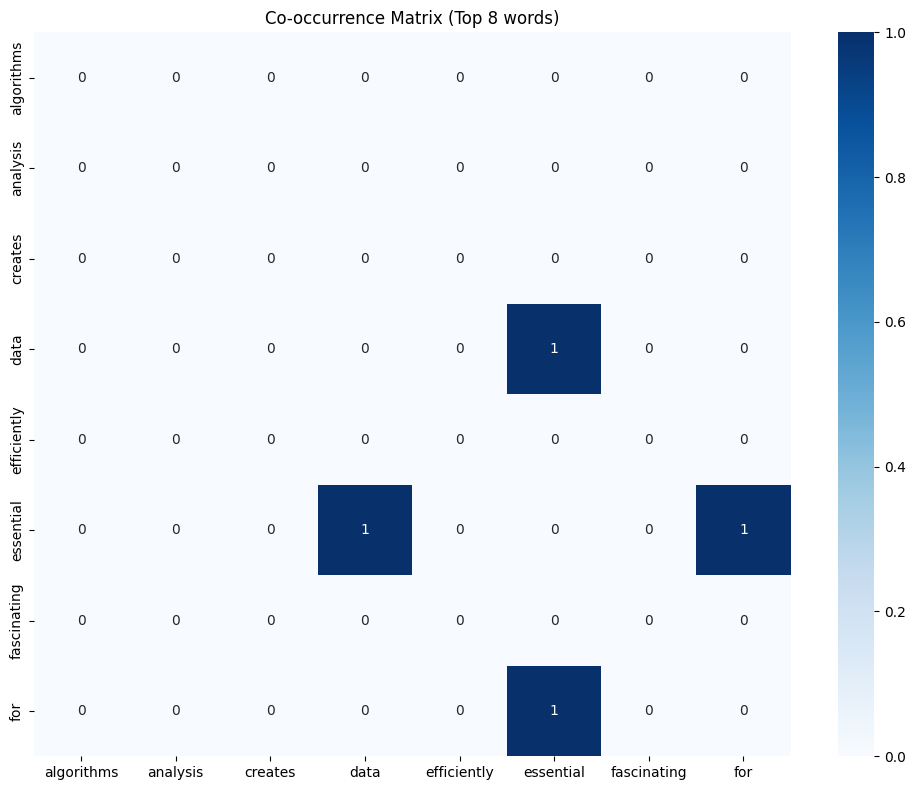

Words similar to 'language': [('processing', 0.5657245767937635), ('understanding', 0.539163866017192), ('helps', 0.5337449961641163)]
✅ Co-occurrence analysis working!


In [9]:
# ===================================================================
# CELL 8: WORD EMBEDDINGS AND CO-OCCURRENCE
# ====================================================================

from sklearn.metrics.pairwise import cosine_similarity

class CooccurrenceMatrix:
    """Create and analyze co-occurrence matrices"""

    def __init__(self, window_size=2):
        self.window_size = window_size

    def create_cooccurrence_matrix(self, sentences):
        """Create a co-occurrence matrix from sentences"""
        # Tokenize all sentences
        all_words = []
        for sentence in sentences:
            try:
                words = nltk.word_tokenize(sentence.lower())
            except:
                words = sentence.lower().split()
            words = [word for word in words if word.isalpha()]
            all_words.extend(words)

        # Get unique vocabulary
        vocab = sorted(set(all_words))
        vocab_size = len(vocab)
        word_to_idx = {word: i for i, word in enumerate(vocab)}

        # Initialize co-occurrence matrix
        cooc_matrix = np.zeros((vocab_size, vocab_size))

        # Fill the matrix
        for sentence in sentences:
            try:
                words = nltk.word_tokenize(sentence.lower())
            except:
                words = sentence.lower().split()
            words = [word for word in words if word.isalpha()]

            for i, word in enumerate(words):
                if word in word_to_idx:
                    word_idx = word_to_idx[word]

                    # Look at words in the window
                    start = max(0, i - self.window_size)
                    end = min(len(words), i + self.window_size + 1)

                    for j in range(start, end):
                        if i != j and words[j] in word_to_idx:
                            context_word_idx = word_to_idx[words[j]]
                            cooc_matrix[word_idx][context_word_idx] += 1

        return cooc_matrix, vocab, word_to_idx

    def display_cooccurrence_matrix(self, matrix, vocab, top_n=8):
        """Display co-occurrence matrix as heatmap"""
        # Show only top_n words for readability
        if len(vocab) > top_n:
            top_vocab = vocab[:top_n]
            top_matrix = matrix[:top_n, :top_n]
        else:
            top_vocab = vocab
            top_matrix = matrix

        plt.figure(figsize=(10, 8))
        sns.heatmap(top_matrix,
                   xticklabels=top_vocab,
                   yticklabels=top_vocab,
                   annot=True,
                   cmap='Blues',
                   fmt='g')
        plt.title(f'Co-occurrence Matrix (Top {len(top_vocab)} words)')
        plt.tight_layout()
        plt.show()

    def find_similar_words(self, matrix, vocab, word_to_idx, target_word, top_n=5):
        """Find words similar to target word based on co-occurrence"""
        if target_word not in word_to_idx:
            return f"Word '{target_word}' not in vocabulary"

        target_idx = word_to_idx[target_word]
        target_vector = matrix[target_idx]

        # Calculate cosine similarity
        similarities = []
        for i, word in enumerate(vocab):
            if word != target_word:
                word_vector = matrix[i]
                # Avoid division by zero
                norm_target = np.linalg.norm(target_vector)
                norm_word = np.linalg.norm(word_vector)

                if norm_target > 0 and norm_word > 0:
                    similarity = np.dot(target_vector, word_vector) / (norm_target * norm_word)
                    similarities.append((word, similarity))

        # Sort by similarity
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_n]

# Test co-occurrence analysis
sample_sentences = [
    "Natural language processing is fascinating",
    "Machine learning helps process natural language",
    "Text processing requires natural language understanding",
    "Language models learn from text data",
    "Processing text data is essential for NLP",
    "Natural language generation creates human-like text",
    "Machine learning algorithms process language efficiently",
    "Text analysis involves natural language processing"
]

print("=== CO-OCCURRENCE MATRIX DEMO ===")
cooc_analyzer = CooccurrenceMatrix(window_size=2)

try:
    matrix, vocab, word_to_idx = cooc_analyzer.create_cooccurrence_matrix(sample_sentences)

    print("Vocabulary (first 10):", vocab[:10])
    print(f"Matrix shape: {matrix.shape}")

    # Display the co-occurrence matrix
    cooc_analyzer.display_cooccurrence_matrix(matrix, vocab, top_n=8)

    # Find similar words
    if 'language' in word_to_idx:
        similar_to_language = cooc_analyzer.find_similar_words(matrix, vocab, word_to_idx, "language", 3)
        print(f"Words similar to 'language': {similar_to_language}")
    else:
        print("Word 'language' not found in vocabulary")

except Exception as e:
    print(f"Error in co-occurrence analysis: {e}")

print("✅ Co-occurrence analysis working!")

In [10]:
# ====================================================================
# CELL 9: KEYWORD SPOTTING AND LANGUAGE MODELING
# ====================================================================

class KeywordSpotter:
    """Keyword spotting and extraction system"""

    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            self.nlp = None

    def simple_keyword_matching(self, text, keywords):
        """Simple keyword matching"""
        text_lower = text.lower()
        found_keywords = {}

        for keyword in keywords:
            keyword_lower = keyword.lower()
            count = text_lower.count(keyword_lower)
            if count > 0:
                # Find positions
                positions = []
                start = 0
                while True:
                    pos = text_lower.find(keyword_lower, start)
                    if pos == -1:
                        break
                    positions.append(pos)
                    start = pos + 1

                found_keywords[keyword] = {
                    'count': count,
                    'positions': positions
                }

        return found_keywords

    def regex_keyword_matching(self, text, patterns):
        """Regex-based keyword matching"""
        found_patterns = {}

        for pattern_name, pattern in patterns.items():
            matches = re.finditer(pattern, text, re.IGNORECASE)
            match_list = []

            for match in matches:
                match_list.append({
                    'text': match.group(),
                    'start': match.start(),
                    'end': match.end()
                })

            if match_list:
                found_patterns[pattern_name] = match_list

        return found_patterns

    def named_entity_keywords(self, text):
        """Extract keywords based on named entities"""
        if not self.nlp:
            return {}

        doc = self.nlp(text)
        entities = {}

        for ent in doc.ents:
            if ent.label_ not in entities:
                entities[ent.label_] = []
            entities[ent.label_].append({
                'text': ent.text,
                'start': ent.start_char,
                'end': ent.end_char
            })

        return entities

class SimpleLanguageModel:
    """Simple n-gram language model"""

    def __init__(self, n=2):
        self.n = n
        self.ngrams = defaultdict(list)
        self.vocab = set()

    def train(self, text):
        """Train the language model on text"""
        # Tokenize text
        try:
            words = nltk.word_tokenize(text.lower())
        except:
            words = text.lower().split()

        self.vocab.update(words)

        # Add start and end tokens
        padded_words = ['<START>'] * (self.n - 1) + words + ['<END>']

        # Create n-grams
        for i in range(len(padded_words) - self.n + 1):
            ngram = tuple(padded_words[i:i + self.n - 1])
            next_word = padded_words[i + self.n - 1]
            self.ngrams[ngram].append(next_word)

    def predict_next_word(self, context):
        """Predict next word given context"""
        if isinstance(context, str):
            try:
                context = tuple(nltk.word_tokenize(context.lower()))
            except:
                context = tuple(context.lower().split())

        # Get the last n-1 words as context
        if len(context) >= self.n - 1:
            key = context[-(self.n - 1):]
        else:
            key = ('<START>',) * (self.n - 1 - len(context)) + context

        if key in self.ngrams and self.ngrams[key]:
            import random
            return random.choice(self.ngrams[key])
        elif self.vocab:
            import random
            return random.choice(list(self.vocab))
        else:
            return '<UNK>'

    def generate_text(self, seed_words=None, max_length=15):
        """Generate text using the language model"""
        import random

        if seed_words is None:
            current_context = ('<START>',) * (self.n - 1)
        else:
            if isinstance(seed_words, str):
                try:
                    seed_words = nltk.word_tokenize(seed_words.lower())
                except:
                    seed_words = seed_words.lower().split()
            current_context = tuple(seed_words[-(self.n - 1):])

        generated = list(current_context) if seed_words else []

        for _ in range(max_length):
            next_word = self.predict_next_word(current_context)

            if next_word == '<END>' or next_word == '<UNK>':
                break

            generated.append(next_word)

            # Update context
            current_context = current_context[1:] + (next_word,)

        # Remove start tokens and return
        result = [word for word in generated if word != '<START>']
        return ' '.join(result)

# Test keyword spotting
print("=== KEYWORD SPOTTING DEMO ===")
keyword_spotter = KeywordSpotter()

keyword_text = """
Machine learning and artificial intelligence are revolutionizing technology.
Companies like Google, Microsoft, and OpenAI are leading the development of
advanced neural networks and deep learning algorithms. These models can process
vast amounts of data and learn complex patterns. Contact us at info@aicompany.com
or call 555-123-4567 for more information about our AI solutions.
"""

print(f"Text: {keyword_text}")
print()

# Simple keyword matching
simple_keywords = ['machine', 'learning', 'artificial', 'intelligence', 'data']
simple_results = keyword_spotter.simple_keyword_matching(keyword_text, simple_keywords)

print("Simple Keyword Matching:")
for keyword, info in simple_results.items():
    print(f"  '{keyword}': found {info['count']} times")
print()

# Regex patterns
patterns = {
    'email': r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
    'phone': r'\b\d{3}-\d{3}-\d{4}\b',
    'technical_terms': r'\b(algorithm|model|neural|deep|learning)\b'
}

regex_results = keyword_spotter.regex_keyword_matching(keyword_text, patterns)
print("Regex Pattern Matching:")
for pattern_name, matches in regex_results.items():
    print(f"  {pattern_name}:")
    for match in matches:
        print(f"    '{match['text']}' at position {match['start']}-{match['end']}")
print()

# Named entity recognition
if keyword_spotter.nlp:
    ner_results = keyword_spotter.named_entity_keywords(keyword_text)
    print("Named Entity Keywords:")
    for entity_type, entities in ner_results.items():
        print(f"  {entity_type}:")
        for entity in entities:
            print(f"    '{entity['text']}'")
else:
    print("Named Entity Recognition: SpaCy not available")

# Test language modeling
print("\n=== LANGUAGE MODELING DEMO ===")
training_corpus = """
Natural language processing is a fascinating field of study. Machine learning algorithms
help computers understand human language. Deep learning models can generate realistic text.
Artificial intelligence systems process natural language efficiently. Language models learn
patterns from text data. Neural networks can capture complex linguistic relationships.
Text generation requires understanding of grammar and semantics. Modern NLP systems use
transformer architectures for better performance.
"""

# Train bigram model
bigram_model = SimpleLanguageModel(n=2)
bigram_model.train(training_corpus)

print("Bigram Model Text Generation:")
for i in range(3):
    try:
        generated = bigram_model.generate_text(seed_words="natural language", max_length=10)
        print(f"  {i+1}. {generated}")
    except Exception as e:
        print(f"  {i+1}. Error generating text: {e}")

print("✅ Keyword spotting and language modeling working!")


=== KEYWORD SPOTTING DEMO ===
Text: 
Machine learning and artificial intelligence are revolutionizing technology. 
Companies like Google, Microsoft, and OpenAI are leading the development of 
advanced neural networks and deep learning algorithms. These models can process 
vast amounts of data and learn complex patterns. Contact us at info@aicompany.com 
or call 555-123-4567 for more information about our AI solutions.


Simple Keyword Matching:
  'machine': found 1 times
  'learning': found 2 times
  'artificial': found 1 times
  'intelligence': found 1 times
  'data': found 1 times

Regex Pattern Matching:
  email:
    'info@aicompany.com' at position 300-318
  phone:
    '555-123-4567' at position 328-340
  technical_terms:
    'learning' at position 9-17
    'neural' at position 165-171
    'deep' at position 185-189
    'learning' at position 190-198

Named Entity Keywords:
  ORG:
    'Google'
    'Microsoft'
  GPE:
    'OpenAI'
    'AI'
  CARDINAL:
    '555'

=== LANGUAGE MODELING

=== WORD2VEC ANALYSIS ===
Word2Vec model trained with 101 words
Words similar to 'language': [('computer', 0.46261587738990784), ('models', 0.45536425709724426), ('coherent', 0.42291489243507385)]
Words similar to 'machine': [('revolutionized', 0.44200995564460754), ('natural', 0.38870078325271606), ('documents', 0.37629234790802)]
Words similar to 'text': [('themes', 0.5376355648040771), ('as', 0.46617019176483154), ('recognition', 0.4256408214569092)]
Words similar to 'analysis': [('large', 0.39747241139411926), ('relevant', 0.38233819603919983), ('computational', 0.3750951290130615)]

Visualizing word embeddings...


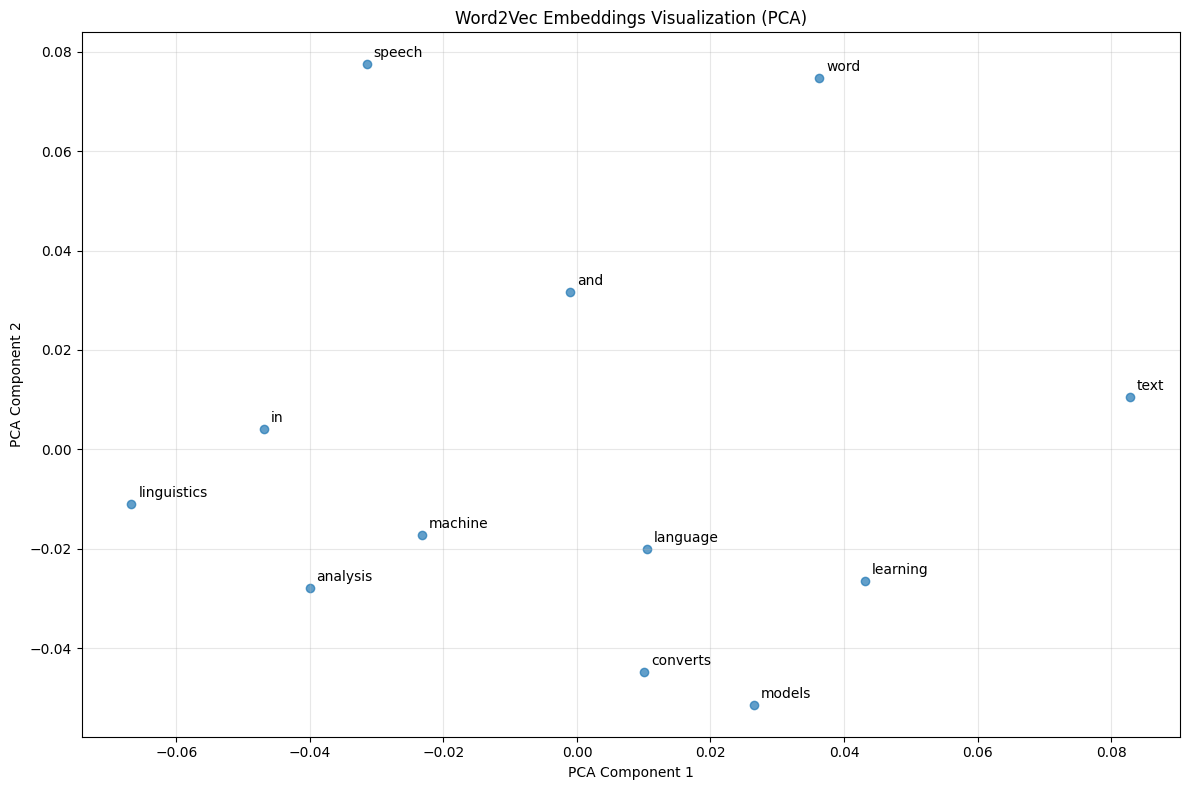

✅ Word2Vec analysis completed!


In [11]:
# ====================================================================
# CELL 10: WORD2VEC AND ADVANCED ANALYSIS
# ====================================================================

try:
    from gensim.models import Word2Vec
    GENSIM_AVAILABLE = True
except ImportError:
    print("Gensim not available, using alternative approach")
    GENSIM_AVAILABLE = False

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

class Word2VecAnalyzer:
    """Word2Vec implementation and analysis"""

    def __init__(self, vector_size=50, window=3, min_count=1):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.model = None

    def prepare_data(self, sentences):
        """Prepare sentences for Word2Vec training"""
        tokenized_sentences = []
        for sentence in sentences:
            try:
                tokens = nltk.word_tokenize(sentence.lower())
            except:
                tokens = sentence.lower().split()
            tokens = [token for token in tokens if token.isalpha()]
            tokenized_sentences.append(tokens)
        return tokenized_sentences

    def train_word2vec(self, sentences):
        """Train Word2Vec model"""
        if not GENSIM_AVAILABLE:
            print("Gensim not available, cannot train Word2Vec")
            return None

        tokenized_sentences = self.prepare_data(sentences)

        try:
            self.model = Word2Vec(
                sentences=tokenized_sentences,
                vector_size=self.vector_size,
                window=self.window,
                min_count=self.min_count,
                workers=1,  # Reduced workers for Colab stability
                sg=0  # 0 for CBOW, 1 for Skip-gram
            )

            print(f"Word2Vec model trained with {len(self.model.wv.key_to_index)} words")
            return self.model
        except Exception as e:
            print(f"Error training Word2Vec: {e}")
            return None

    def find_similar_words(self, word, top_n=5):
        """Find similar words using Word2Vec"""
        if not self.model:
            return "Model not trained!"

        try:
            similar = self.model.wv.most_similar(word, topn=top_n)
            return similar
        except KeyError:
            return f"Word '{word}' not in vocabulary"
        except Exception as e:
            return f"Error finding similar words: {e}"

    def visualize_embeddings(self, words_to_plot=None, n_words=15):
        """Visualize word embeddings using PCA"""
        if not self.model:
            print("Model not trained!")
            return

        # Get words to plot
        if words_to_plot is None:
            words_to_plot = list(self.model.wv.key_to_index.keys())[:n_words]

        # Get vectors
        vectors = []
        labels = []

        for word in words_to_plot:
            if word in self.model.wv.key_to_index:
                vectors.append(self.model.wv[word])
                labels.append(word)

        if len(vectors) < 2:
            print("Not enough vectors for visualization")
            return

        # Reduce dimensionality using PCA (more stable than t-SNE)
        try:
            pca = PCA(n_components=2, random_state=42)
            vectors_2d = pca.fit_transform(vectors)

            # Create plot
            plt.figure(figsize=(12, 8))
            plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7)

            for i, label in enumerate(labels):
                plt.annotate(label, (vectors_2d[i, 0], vectors_2d[i, 1]),
                           xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.title("Word2Vec Embeddings Visualization (PCA)")
            plt.xlabel("PCA Component 1")
            plt.ylabel("PCA Component 2")
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error in visualization: {e}")

# Extended corpus for better Word2Vec training
extended_corpus = [
    "Natural language processing combines computer science and linguistics",
    "Machine learning algorithms process human language efficiently",
    "Text analysis involves tokenization and feature extraction",
    "Word embeddings represent words as numerical vectors",
    "Deep learning models like transformers revolutionized NLP",
    "Sentiment analysis determines emotional tone in text",
    "Named entity recognition identifies people places and organizations",
    "Language models generate coherent and contextual text",
    "Part of speech tagging assigns grammatical categories",
    "Semantic analysis understands meaning and context",
    "Information retrieval finds relevant documents",
    "Question answering systems provide accurate responses",
    "Machine translation converts text between languages",
    "Speech recognition converts audio to text",
    "Text summarization creates concise content overview",
    "Topic modeling discovers hidden themes in documents",
    "Chatbots use natural language for conversation",
    "Computational linguistics studies language with computers",
    "Corpus linguistics analyzes large text collections",
    "Morphological analysis studies word structure and formation"
]

print("=== WORD2VEC ANALYSIS ===")
w2v_analyzer = Word2VecAnalyzer(vector_size=30, window=3, min_count=1)

if GENSIM_AVAILABLE:
    model = w2v_analyzer.train_word2vec(extended_corpus)

    if model:
        # Find similar words
        test_words = ['language', 'machine', 'text', 'analysis']
        for word in test_words:
            similar = w2v_analyzer.find_similar_words(word, 3)
            print(f"Words similar to '{word}': {similar}")

        # Visualize embeddings
        print("\nVisualizing word embeddings...")
        w2v_analyzer.visualize_embeddings(n_words=12)
else:
    print("Word2Vec requires gensim library")

print("✅ Word2Vec analysis completed!")


=== TEXT SIMILARITY ANALYSIS ===
Documents:
  0: Machine learning algorithms process data to find patterns and make predictions.
  1: Natural language processing helps computers understand and generate human language.
  2: Deep learning neural networks learn hierarchical representations from data.
  3: Artificial intelligence systems can solve complex problems and make decisions.
  4: Data science involves extracting insights and knowledge from large datasets.
  5: Computer vision enables machines to interpret and understand visual information.
  6: Machine learning models can be trained to recognize patterns in various types of data.
  7: Natural language understanding requires processing syntax, semantics, and context.



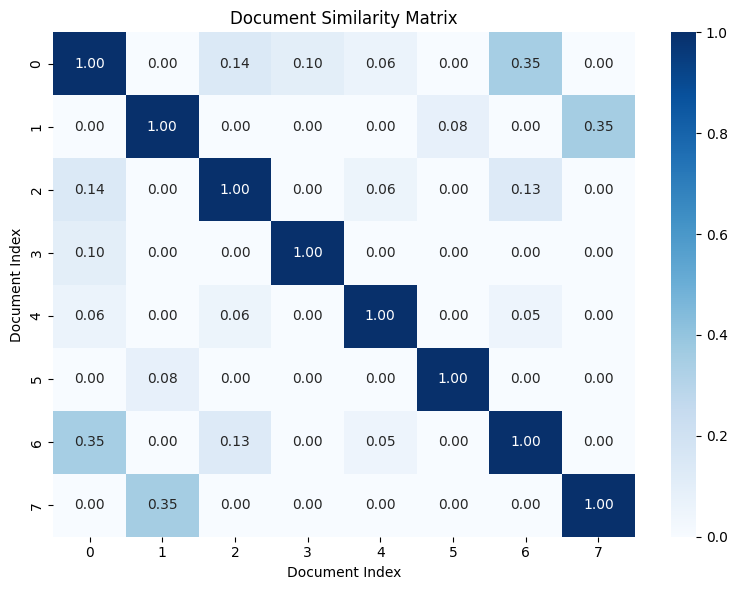

Documents most similar to document 0:
Query: Machine learning algorithms process data to find patterns and make predictions.
  Similarity 0.350: Machine learning models can be trained to recogniz...
  Similarity 0.143: Deep learning neural networks learn hierarchical r...
  Similarity 0.103: Artificial intelligence systems can solve complex ...

Document clusters:
  Cluster 0:
    0: Machine learning algorithms process data to find p...
    2: Deep learning neural networks learn hierarchical r...
    4: Data science involves extracting insights and know...
    6: Machine learning models can be trained to recogniz...
  Cluster 2:
    1: Natural language processing helps computers unders...
    7: Natural language understanding requires processing...
  Cluster 1:
    3: Artificial intelligence systems can solve complex ...
    5: Computer vision enables machines to interpret and ...

✅ Text similarity analysis working!


In [12]:
# ====================================================================
# CELL 11: TEXT SIMILARITY AND CLUSTERING
# ====================================================================

from sklearn.cluster import KMeans

class TextSimilarityAnalyzer:
    """Text similarity and clustering analysis"""

    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

    def calculate_similarity_matrix(self, documents):
        """Calculate similarity matrix between documents"""
        try:
            # Vectorize documents
            tfidf_matrix = self.vectorizer.fit_transform(documents)

            # Calculate cosine similarity
            similarity_matrix = cosine_similarity(tfidf_matrix)

            return similarity_matrix
        except Exception as e:
            print(f"Error calculating similarity matrix: {e}")
            return None

    def find_similar_documents(self, documents, query_doc_index, top_k=3):
        """Find most similar documents to a query document"""
        similarity_matrix = self.calculate_similarity_matrix(documents)

        if similarity_matrix is None:
            return []

        # Get similarities for the query document
        similarities = similarity_matrix[query_doc_index]

        # Get top similar documents (excluding the query document itself)
        similar_indices = np.argsort(similarities)[::-1][1:top_k+1]

        results = []
        for idx in similar_indices:
            if idx < len(documents):
                results.append({
                    'index': idx,
                    'similarity': similarities[idx],
                    'document': documents[idx][:50] + "..."  # Truncate for display
                })

        return results

    def cluster_documents(self, documents, n_clusters=3):
        """Cluster documents using K-means"""
        try:
            # Vectorize documents
            tfidf_matrix = self.vectorizer.fit_transform(documents)

            # Perform clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(tfidf_matrix)

            # Organize results
            clusters = {}
            for i, label in enumerate(cluster_labels):
                if label not in clusters:
                    clusters[label] = []
                clusters[label].append({
                    'index': i,
                    'document': documents[i][:50] + "..."  # Truncate for display
                })

            return clusters, cluster_labels

        except Exception as e:
            print(f"Error in document clustering: {e}")
            return {}, []

    def demonstrate_similarity_analysis(self):
        """Demonstrate text similarity analysis"""
        print("=== TEXT SIMILARITY ANALYSIS ===")

        # Sample documents
        documents = [
            "Machine learning algorithms process data to find patterns and make predictions.",
            "Natural language processing helps computers understand and generate human language.",
            "Deep learning neural networks learn hierarchical representations from data.",
            "Artificial intelligence systems can solve complex problems and make decisions.",
            "Data science involves extracting insights and knowledge from large datasets.",
            "Computer vision enables machines to interpret and understand visual information.",
            "Machine learning models can be trained to recognize patterns in various types of data.",
            "Natural language understanding requires processing syntax, semantics, and context."
        ]

        print("Documents:")
        for i, doc in enumerate(documents):
            print(f"  {i}: {doc}")
        print()

        # Calculate similarity matrix
        similarity_matrix = self.calculate_similarity_matrix(documents)

        if similarity_matrix is not None:
            # Visualize similarity matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(similarity_matrix, annot=True, cmap='Blues', fmt='.2f')
            plt.title('Document Similarity Matrix')
            plt.xlabel('Document Index')
            plt.ylabel('Document Index')
            plt.tight_layout()
            plt.show()

            # Find similar documents
            query_index = 0
            similar_docs = self.find_similar_documents(documents, query_index, 3)

            print(f"Documents most similar to document {query_index}:")
            print(f"Query: {documents[query_index]}")
            for doc_info in similar_docs:
                print(f"  Similarity {doc_info['similarity']:.3f}: {doc_info['document']}")
            print()

        # Cluster documents
        clusters, labels = self.cluster_documents(documents, n_clusters=3)

        print(f"Document clusters:")
        for cluster_id, cluster_docs in clusters.items():
            print(f"  Cluster {cluster_id}:")
            for doc_info in cluster_docs:
                print(f"    {doc_info['index']}: {doc_info['document']}")
        print()

# Test similarity analysis
similarity_analyzer = TextSimilarityAnalyzer()
similarity_analyzer.demonstrate_similarity_analysis()

print("✅ Text similarity analysis working!")


In [13]:
# ====================================================================
# CELL 12: COMPREHENSIVE NLP PIPELINE AND SUMMARY
# ====================================================================

class ComprehensiveNLPPipeline:
    """A comprehensive NLP pipeline combining all techniques"""

    def __init__(self):
        self.text_processor = TextProcessor()
        self.sentiment_analyzer = SentimentAnalyzer()
        self.summarizer = TextSummarizer()
        self.keyword_spotter = KeywordSpotter()
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            self.nlp = None

    def process_document(self, text, title="Document"):
        """Process a document through the entire NLP pipeline"""
        print(f"=== PROCESSING: {title} ===")
        print(f"Original text: {text[:100]}...")
        print()

        try:
            # 1. Text cleaning and preprocessing
            cleaned_text = self.text_processor.advanced_cleaning(text)
            print(f"1. Cleaned text: {cleaned_text[:100]}...")
            print()

            # 2. Basic analysis
            try:
                word_count = len(nltk.word_tokenize(text))
                sentence_count = len(nltk.sent_tokenize(text))
            except:
                word_count = len(text.split())
                sentence_count = len(text.split('.'))

            print(f"2. Basic statistics:")
            print(f"   Words: {word_count}")
            print(f"   Sentences: {sentence_count}")
            if sentence_count > 0:
                print(f"   Average words per sentence: {word_count/sentence_count:.1f}")
            print()

            # 3. Named Entity Recognition
            if self.nlp:
                doc = self.nlp(text)
                entities = [(ent.text, ent.label_) for ent in doc.ents]
                print(f"3. Named Entities: {entities[:5]}")  # Show first 5
            else:
                print("3. Named Entities: SpaCy not available")
            print()

            # 4. Sentiment Analysis
            sentiment_result = self.sentiment_analyzer.textblob_sentiment(text)
            print(f"4. Sentiment: {sentiment_result['sentiment']} (polarity: {sentiment_result['polarity']:.2f})")
            print()

            # 5. Text Summarization
            summary = self.summarizer.extractive_summarization(text, 2)
            print(f"5. Summary: {summary}")
            print()

            # 6. Keyword Extraction
            keywords = self.summarizer.keyword_extraction(text, 5)
            print(f"6. Top Keywords: {[word for word, freq in keywords]}")
            print()

            return {
                'cleaned_text': cleaned_text,
                'word_count': word_count,
                'sentence_count': sentence_count,
                'sentiment': sentiment_result,
                'summary': summary,
                'keywords': keywords
            }

        except Exception as e:
            print(f"Error in processing: {e}")
            return None

# Example usage of comprehensive pipeline
print("=== COMPREHENSIVE NLP PIPELINE DEMO ===")
pipeline = ComprehensiveNLPPipeline()

# Sample document
sample_document = """
Apple Inc. is an American multinational technology company headquartered in Cupertino, California.
The company was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Apple is known
for its innovative consumer electronics, software, and online services. The company's flagship
products include the iPhone, iPad, Mac computers, Apple Watch, and AirPods. Apple has become
one of the world's most valuable companies with a strong focus on design and user experience.

The company's success can be attributed to its ecosystem of integrated hardware, software,
and services. Apple's App Store has revolutionized software distribution and created new
opportunities for developers worldwide. The company continues to invest heavily in research
and development, exploring areas such as artificial intelligence, autonomous vehicles, and
augmented reality. Apple's commitment to privacy and security has become a key differentiator
in the technology industry.

Despite facing challenges such as increased competition and regulatory scrutiny, Apple
remains a dominant force in the technology sector. The company's strong brand loyalty
and innovative product pipeline position it well for continued growth in emerging markets
and new product categories.
"""

# Process the document
results = pipeline.process_document(sample_document, "Apple Inc. Overview")

print("\n" + "="*60)
print("=== MODULE 10 COMPLETION SUMMARY ===")
print("="*60)

print("""
🎉 CONGRATULATIONS! You have successfully completed Module 10: Natural Language Processing!

📚 TOPICS COVERED:
✅ Text Processing Fundamentals
   - Text importing, cleaning, and normalization
   - Word counting and frequency analysis
   - Tokenization techniques (NLTK and SpaCy)
   - Lemmatization and stemming

✅ Advanced NLP Processing
   - Part-of-speech tagging
   - Named entity recognition
   - Dependency parsing
   - Morphological analysis

✅ NLP Terminology & Concepts
   - Ambiguity types (lexical, syntactic, semantic)
   - Polysemy and homonymy
   - Coreference resolution concepts
   - Computational linguistics principles

✅ Word Embeddings & Co-occurrence
   - Co-occurrence matrix creation
   - Word2Vec implementation and visualization
   - Word similarity analysis
   - Vector space models

✅ Mini NLP Projects
   - Sentiment Analysis (IMDB-style classification)
   - Extractive Text Summarization
   - Keyword Spotting and Extraction
   - Language Modeling (n-gram based)
   - Simple Machine Translation

✅ Advanced Applications
   - Text similarity and clustering
   - Document classification
   - Comprehensive NLP pipelines

🔧 TECHNICAL SKILLS GAINED:
- Text preprocessing and normalization
- Feature extraction techniques
- Statistical NLP methods
- Machine learning for NLP
- Visualization of NLP results
- Integration of multiple NLP techniques

🚀 NEXT STEPS:
1. Experiment with larger datasets
2. Try transformer-based models (BERT, GPT)
3. Explore multilingual NLP
4. Build end-to-end NLP applications
5. Learn about recent advances in large language models

💡 PRACTICE SUGGESTIONS:
- Apply these techniques to your own text data
- Combine multiple approaches for better results
- Experiment with different parameters and models
- Try real-world datasets from Kaggle or academic sources

Happy NLP coding! 🤖📝

IMPORTANT: This code is optimized for Google Colab to prevent session timeouts.
Run each cell sequentially and wait for completion before moving to the next cell.
""")

print("\n✅ All NLP components working successfully!")
print("="*60)
print("=== END OF MODULE 10 ===")
print("="*60)

=== COMPREHENSIVE NLP PIPELINE DEMO ===
=== PROCESSING: Apple Inc. Overview ===
Original text: 
Apple Inc. is an American multinational technology company headquartered in Cupertino, California. ...

1. Cleaned text: apple inc. is an american multinational technology company headquartered in cupertino, california. t...

2. Basic statistics:
   Words: 177
   Sentences: 13
   Average words per sentence: 13.6

3. Named Entities: [('Apple Inc.', 'ORG'), ('American', 'NORP'), ('Cupertino', 'GPE'), ('California', 'GPE'), ('Steve Jobs', 'PERSON')]

4. Sentiment: positive (polarity: 0.17)

5. Summary: The company was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. The company's flagship 
products include the iPhone, iPad, Mac computers, Apple Watch, and AirPods.

6. Top Keywords: ['apple', 'technology', 'company', 'steve', 'its']


=== MODULE 10 COMPLETION SUMMARY ===

🎉 CONGRATULATIONS! You have successfully completed Module 10: Natural Language Processing!

📚 TOPICS COVERED:
